### Clustering Customers from a bank for Marketing

In [3]:
#Importing the necessary libraries

import pandas as pd #For data processing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler #For encoding and scaling respectively
from sklearn.cluster import KMeans #For the clustering model
from sklearn.metrics import silhouette_score #For checking the accuracy scores
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading the dataset

df = pd.read_csv('C:/Users/USER/Downloads/bank+marketing/bank/bank-full.csv', sep = ';', header=0)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Data Analysis

In [5]:
#Understanding the dimensions of the dataset

df.shape

(45211, 17)

The dataset has 45211 rows and 17 columns

In [6]:
#Obtaining summary statistics of the non-categorical columns in the dataset

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
#Checking the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
#Categorizing the columns as either categorical or non-categorical

categorical_columns = []
non_categorical_columns = []

for i in df.columns:
    if df[i].dtypes == 'object':
        categorical_columns.append(i)
    elif df[i].dtypes == 'int64':
        non_categorical_columns.append(i)
    
print('Categorical Columns: \n',categorical_columns)
print('\nNon-Categorical Columns: \n', non_categorical_columns)

Categorical Columns: 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

Non-Categorical Columns: 
 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


The columns have been categorized as either categorical or non-categorical for simplified analysis

In [9]:
#Checking for duplicates

df.duplicated().sum()

0

The dataset has no duplicates

In [10]:
#Checking for nulls in the columns denoted as unknown

for i in df.columns:
    x = df[df[i] == 'unknown']
    
    print(i,':',len(x))
    

age : 0
job : 288
marital : 0
education : 1857
default : 0
balance : 0
housing : 0
loan : 0
contact : 13020
day : 0
month : 0
duration : 0
campaign : 0
pdays : 0
previous : 0
poutcome : 36959
y : 0


We can note that 4 columns contain unknowns that will need to be replaced with NaN and filled accordingly

In [11]:
#Replacing the unknowns with NaN

df.replace('unknown', np.NaN, inplace = True)

#Checking for the nulls

df.isna().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

The nulls have been identified

In [12]:
#Filling the nulls with the mode since they are all categorical variables

df[['education', 'contact','poutcome','job']].mode() #Getting the mode of the columns and their indexes

,education,contact,poutcome,job
0,secondary,cellular,failure,blue-collar


In [13]:
#Filling the nulls

columns = ['education','contact','poutcome','job']

for i in columns:
    df[i].fillna(df[i].mode()[0], inplace=True)


df.isna().sum() #Confirming if the nulls have been filled

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

All nulls have been filled accordingly

### Visualizations

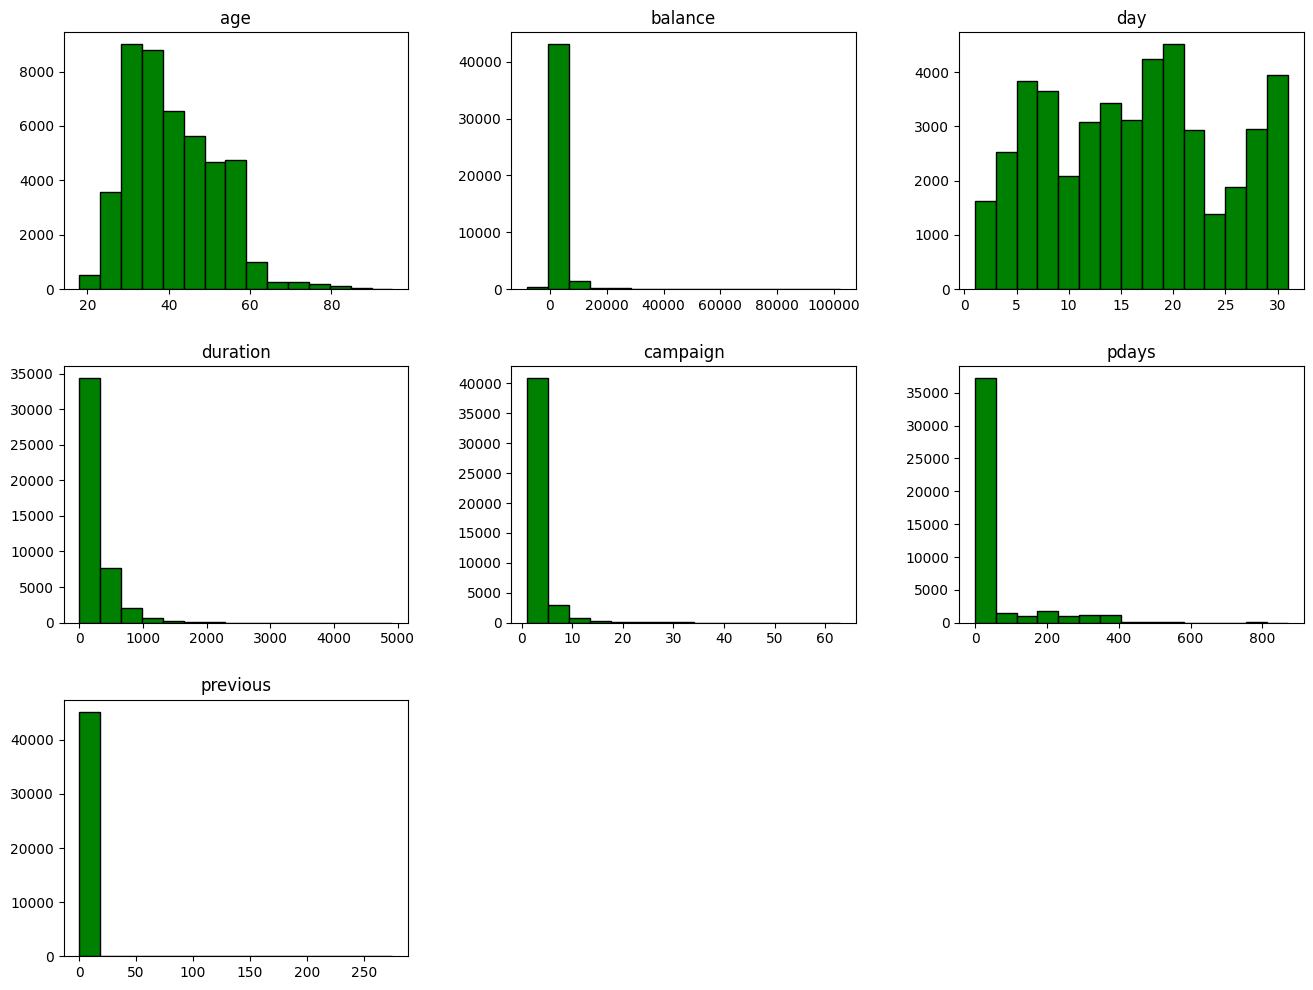

In [14]:
# Univariate Visualizations

#Histograms

plt.rcParams['figure.figsize'] = (16,12)
df.hist(grid=False, color = 'green', edgecolor = 'black', bins = 15)
plt.show()

- Most customers age are seen to be between 30 and 45 years.
- Most balances are seen to range between 0 and 5000.
- Days column is seen to be evenly distributed.
- Duration column is lefy skewed with most values ranging between 0 and 300.
- Campaign column is also left skewed with most values ranging ar 3.
- Most values in the pdays column is seen to be at 50.
- Previous prchases by customers are seen to be between 0 and 15.

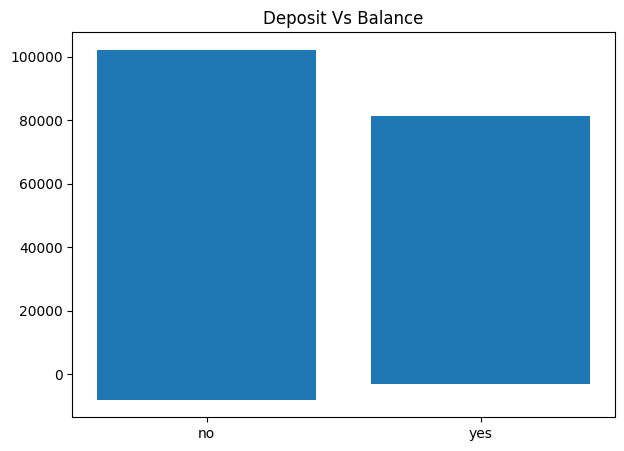

In [15]:
#Multivariate visualizations against the y column

#Barplots
y = df['balance']
x = df['y']


plt.figure(figsize = (7,5))
plt.bar(x,y)
plt.title('Deposit Vs Balance')
plt.show()

Customers with no deposits are seen to have lower account balances than those with deposits.

Text(0.5, 1.0, 'Age Vs Y')

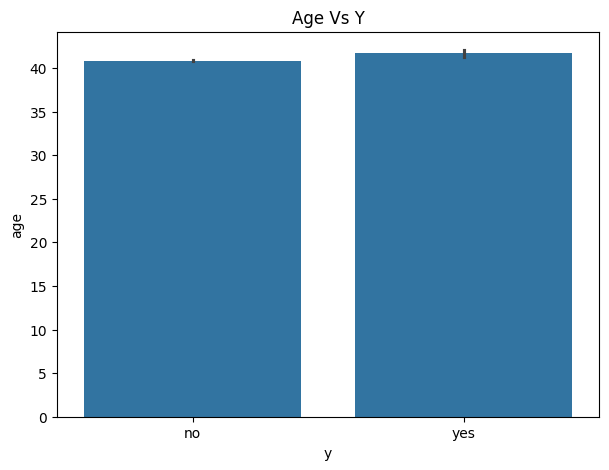

In [16]:
plt.figure(figsize=(7,5))
sns.barplot(y = df['age'], x = df['y'])
plt.title('Age Vs Y')

The ages of the clients who made deposits and those who did not are about the same

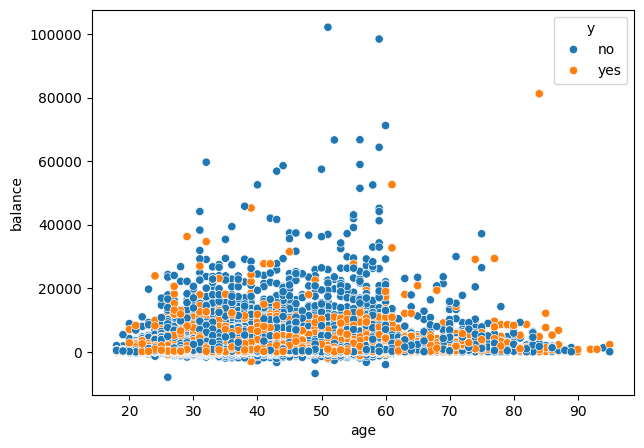

In [17]:
#Scatter plots

plt.figure(figsize=(7,5))
sns.scatterplot(x = df['age'], y = df['balance'], hue = df['y'])
plt.show()
#non_categorical_columns

Age and balance have no correlation and one cannot be used to determine the other. 

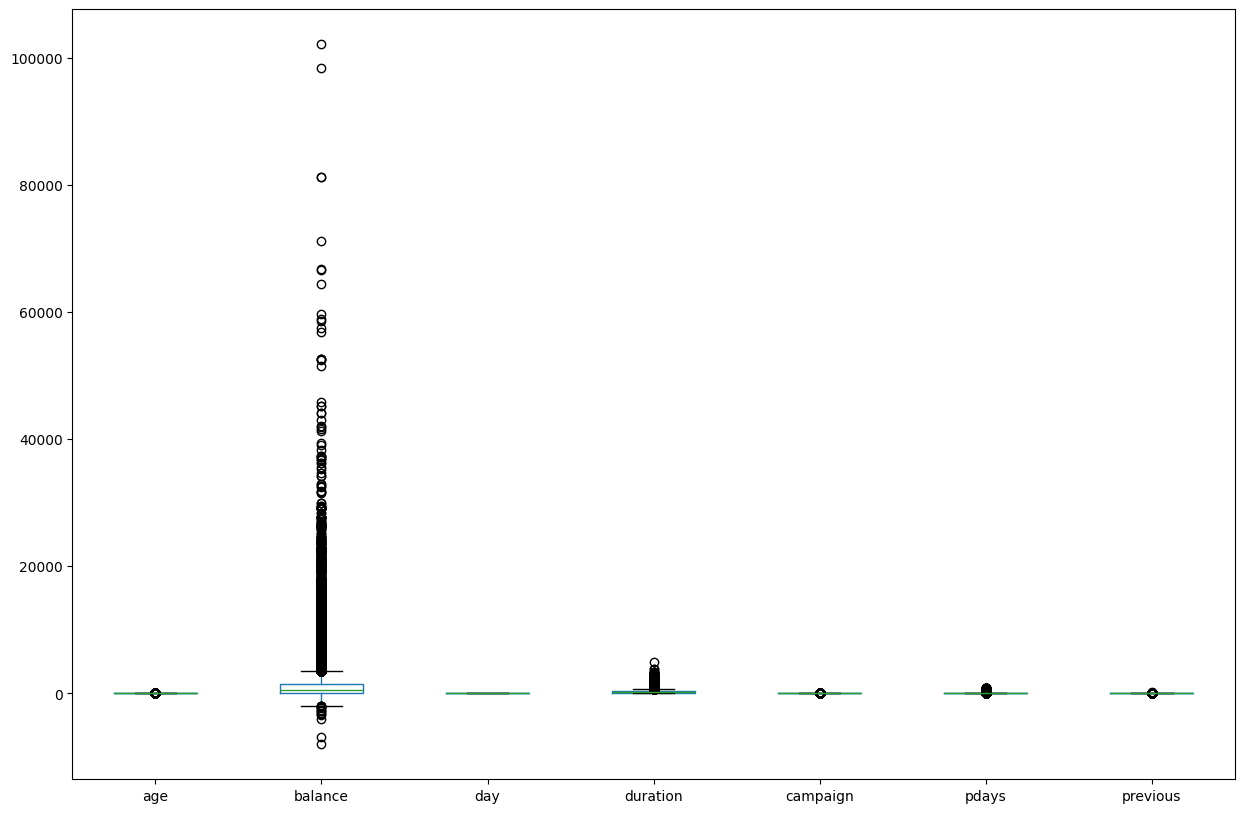

In [18]:
#Checking for outliers

plt.rcParams['figure.figsize'] = (15,10)
df.boxplot(grid = False)
plt.show()

The non categorical columns above are seen to have outliers that need to be removed

In [19]:
#Removing the outliers

for i in non_categorical_columns:
    
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1 - IQR*1.5
    upper_bound = Q3 + IQR*1.5
    
    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
    
print(len(outliers))

8257


The non categorical columns have 8257 outliers than need to be removed

In [20]:
#Removing the outliers

df = df.copy()

df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]
df.shape

(36954, 17)

All outliers have been removed

In [21]:
# #Label encoding

label_encoder = LabelEncoder()

for i in categorical_columns:
    df[i] = label_encoder.fit_transform(df[i])
    
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,0,5,8,261,1,-1,0,0,0
1,44,9,2,1,0,29,1,0,0,5,8,151,1,-1,0,0,0
2,33,2,1,1,0,2,1,1,0,5,8,76,1,-1,0,0,0
3,47,1,1,1,0,1506,1,0,0,5,8,92,1,-1,0,0,0
4,33,1,2,1,0,1,0,0,0,5,8,198,1,-1,0,0,0


All Categorical columns have been encoded

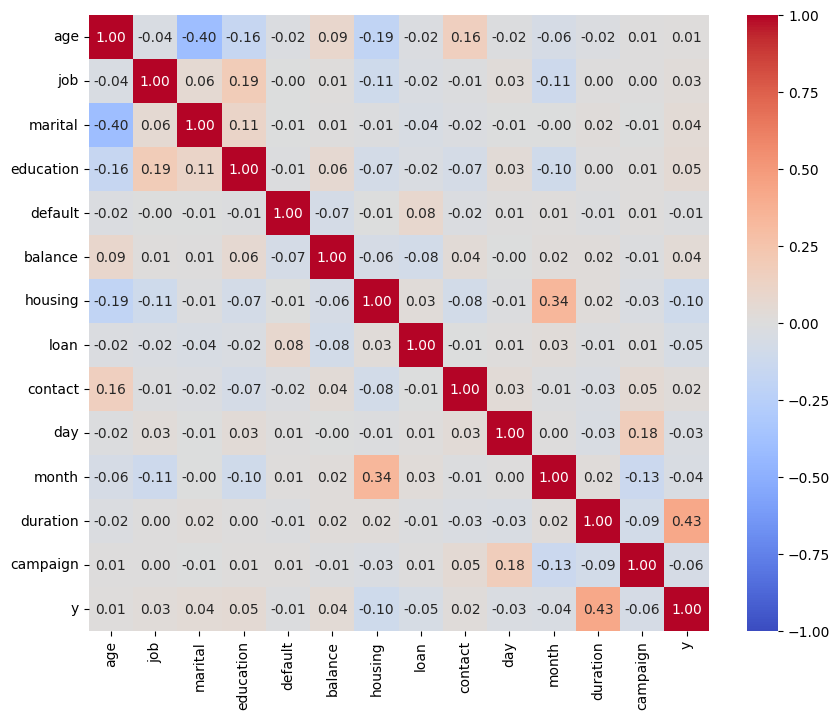

In [22]:
#Correlation matrix and Heatmap

cols = df.drop(columns=['pdays', 'previous','poutcome'])
matrix = cols.corr()

plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot = True, fmt = '.2f', vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')
plt.show()

Most of the variables are seen to have no correlation with the target column 'Y'.

In [23]:
#Checking the columns that are highly correlated to the y column

cols.corr()['y'].sort_values(ascending=False)[:6]

y            1.000000
duration     0.427082
education    0.051083
marital      0.040264
balance      0.039957
job          0.030942
Name: y, dtype: float64

These are the top 5 highly correlated variable to the targect column, although only one has a correlation of more than 0.01

In [24]:
#Scaling the balance and duration columns

scaler = StandardScaler()

df['balance'] = scaler.fit_transform(df[['balance']])
df['duration'] = scaler.fit_transform(df[['duration']])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,0.271165,1,0,0,5,8,0.012484,1,-1,0,0,0
1,44,9,2,1,0,-0.424340,1,0,0,5,8,-0.406959,1,-1,0,0,0
2,33,2,1,1,0,-0.433223,1,1,0,5,8,-0.692942,1,-1,0,0,0
3,47,1,1,1,0,0.061592,1,0,0,5,8,-0.631933,1,-1,0,0,0
4,33,1,2,1,0,-0.433552,0,0,0,5,8,-0.227742,1,-1,0,0,0


Both balance and duration columns have been scaled.

### KMeans Clustering

In [25]:
#Feature Engineering


X = df.drop(columns=['campaign','pdays','previous','poutcome','y','contact','day','month', 'contact', 'marital'], axis = 1) #Choosing the relevant columns to cluster


#Initializing the model

model = KMeans(n_clusters= 2, random_state=42)

#Fitting the model

model.fit(X)

#Checking the cluster labels

df['clusters'] = model.labels_

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,clusters
0,58,4,1,2,0,0.271165,1,0,0,5,8,0.012484,1,-1,0,0,0,1
1,44,9,2,1,0,-0.424340,1,0,0,5,8,-0.406959,1,-1,0,0,0,1
2,33,2,1,1,0,-0.433223,1,1,0,5,8,-0.692942,1,-1,0,0,0,0
3,47,1,1,1,0,0.061592,1,0,0,5,8,-0.631933,1,-1,0,0,0,1
4,33,1,2,1,0,-0.433552,0,0,0,5,8,-0.227742,1,-1,0,0,0,0


In [26]:
#Checking the center points pf the 2 clusters

center_points = model.cluster_centers_
center_points

array([[ 3.37435642e+01,  4.36579949e+00,  1.21265410e+00,
         2.14829587e-02, -6.04625932e-02,  6.07233503e-01,
         1.64702683e-01,  2.18413984e-02],
       [ 5.15848892e+01,  4.13579584e+00,  1.00792478e+00,
         1.90732035e-02,  8.95934624e-02,  4.42578912e-01,
         1.67024849e-01, -3.23645812e-02]])

In [27]:
#Checking the accuracy of the KMeans model

sil_score = silhouette_score(X, df['clusters'])
print(round(sil_score,2))

0.52


The KMeans clustering model is seen to have an accuracy of 0.53 which is seen as a moderate score. 

In [28]:
#Using the PCA for dimentionality reduction and see whether the model improves

pca = PCA(n_components=2)

X_reduced = pca.fit_transform(X)

model = KMeans(n_clusters= 2, random_state=42)

model.fit(X_reduced)


df['clusters'] = model.labels_


sil_score = silhouette_score(X_reduced, df['clusters'])
print(round(sil_score,2))

0.54


The silhouette score is seen to slightly improve to 0.54 after dimentionality reduction. Although still not a good score

#### Finding the appropriate number of clusters

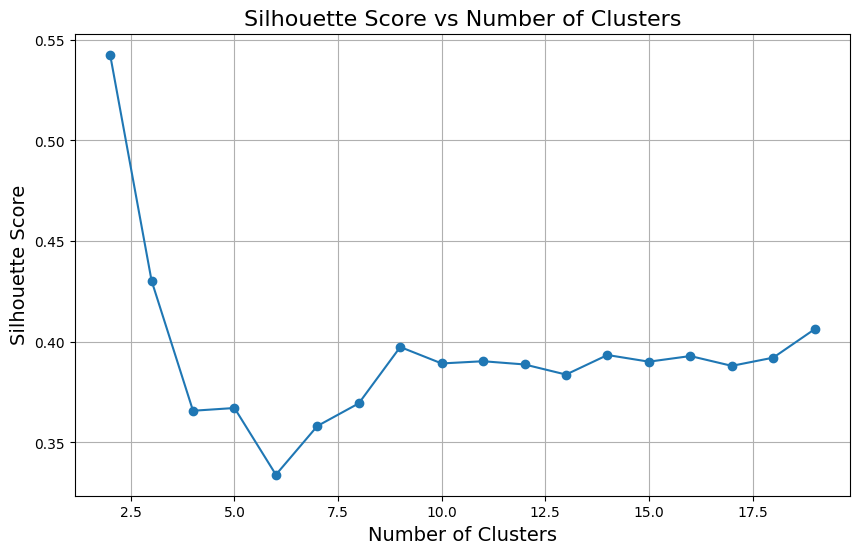

In [32]:
clusters = range(2,20)  
silhouette = []

for i in clusters:

    model = KMeans(n_clusters=i, random_state=42)
    model.fit(X_reduced)
    

    labels = model.labels_
    score = sil_score(X_reduced, labels)
    silhouette.append(score)


plt.figure(figsize=(10,6))
plt.plot(clusters, silhouette, marker='o')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.title('Silhouette Score vs Number of Clusters', fontsize=16)
plt.grid(True)
plt.show()


- The ideal number of clusters is 2 as it gives us the highest accuracy.
- With the Silhouette Score of 0.54, there may have some overlap in the clustering. 

## KNN Model Classifier

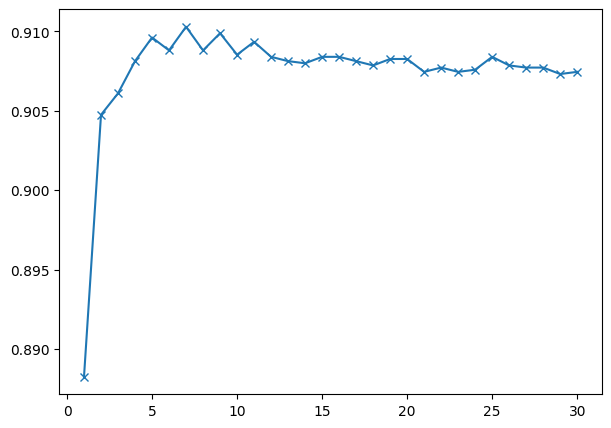

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


X = df.drop('y', axis=1)
y = df['y']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

accuracies = []
k_vals = range(1,31)

for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train,y_train)
    y_predict = knn.predict(X_test)
    
    accuracy = accuracy_score(y_predict,y_test)
    
    accuracies.append(accuracy)

plt.figure(figsize=(7,5))
plt.plot(k_vals, accuracies,marker='x')
plt.show()

The optimum number of n neighbors is 7 as it gives us the highest accuracy of 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)

accuracy = accuracy_score(y_predict,y_test)

print(round(accuracy, 2))

0.91


The accuracy of the KNN model is 0.91